In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import numpy as np
from matplotlib.pyplot import plot as tplt
import keras
import sys
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils, to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


1. model with dynamic lmfcc features

In [0]:
# Load data
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'lmfcc_train_s.npz', allow_pickle=True) as data:
    X = data['lmfcc_x']
    Y = data['targets']
with np.load(path +'lmfcc_val_s.npz', allow_pickle=True) as data:
    X_val = data['lmfcc_x']
    Y_val = data['targets']
with np.load(path + 'lmfcc_test_s.npz', allow_pickle=True) as data:
    X_test = data['lmfcc_x']
    Y_test = data['targets']



In [0]:
X.shape
len(Y)

1354605

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=15, batch_size=256, validation_data = (X_val, Y_val))

Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 22s 16us/step - loss: 0.7990 - accuracy: 0.7386 - val_loss: 0.6900 - val_accuracy: 0.7684
Epoch 2/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.6258 - accuracy: 0.7874 - val_loss: 0.6325 - val_accuracy: 0.7843
Epoch 3/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5751 - accuracy: 0.8023 - val_loss: 0.6059 - val_accuracy: 0.7943
Epoch 4/15
1354605/1354605 [==============================] - 21s 15us/step - loss: 0.5454 - accuracy: 0.8117 - val_loss: 0.5962 - val_accuracy: 0.7990
Epoch 5/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5252 - accuracy: 0.8180 - val_loss: 0.5944 - val_accuracy: 0.7992
Epoch 6/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5104 - accuracy: 0.8226 - val_loss: 0.5883 - val_accuracy: 0.8014
Epoch 7/15
1354605/1354605 [=======

In [0]:
model.save(path + 'lmfcc_dynamic_adam.h5')

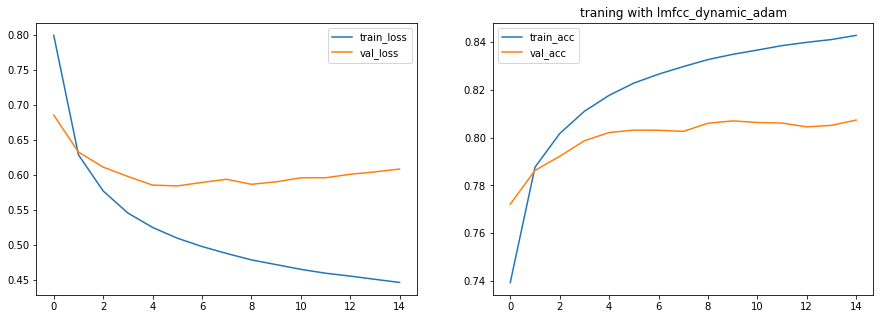

In [0]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for traning with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('traning with lmfcc_dynamic_adam')
plt.show()


1526682/1526682 [==============================] - 17s 11us/step
accuracy: 76.98%

Confusion Matrix


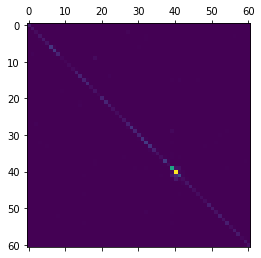

In [0]:
model = load_model(path + 'lmfcc_dynamic_adam.h5')
score = model.evaluate(X_test, Y_test, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
Y_pred = model.predict(X_test)
#save_predictions(Y_test, Y_pred, 'lmfcc_dynamic')
print('\nConfusion Matrix')
plt.matshow(confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
plt.show()
#print('Classification Report')
#print(classification_report(Y_test.argmax(axis=1), Y_pred.argmax(axis=1), target_names=stateList))

2 .Model with mspec dynamic features

In [0]:
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'mspec_train_s.npz', allow_pickle=True) as data:
    X = data['mspec_x']
    Y = data['targets']
with np.load(path +'mspec_val_s.npz', allow_pickle=True) as data:
    X_val = data['mspec_x']
    Y_val = data['targets']
with np.load(path + 'mspec_test_s.npz', allow_pickle=True) as data:
    X_test = data['mspec_x']
    Y_test = data['targets']


In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=15, batch_size=256, validation_data = (X_val, Y_val))

model.save(path + 'mspec_dynamic_adam.h5')


Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 21s 16us/step - loss: 0.8363 - accuracy: 0.7257 - val_loss: 0.7237 - val_accuracy: 0.7549
Epoch 2/15
1354605/1354605 [==============================] - 21s 15us/step - loss: 0.6601 - accuracy: 0.7772 - val_loss: 0.6600 - val_accuracy: 0.7765
Epoch 3/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.6111 - accuracy: 0.7923 - val_loss: 0.6361 - val_accuracy: 0.7862
Epoch 4/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5809 - accuracy: 0.8013 - val_loss: 0.6234 - val_accuracy: 0.7917
Epoch 5/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5609 - accuracy: 0.8078 - val_loss: 0.6223 - val_accuracy: 0.7935
Epoch 6/15
1354605/1354605 [==============================] - 20s 15us/step - loss: 0.5455 - accuracy: 0.8126 - val_loss: 0.6105 - val_accuracy: 0.7976
Epoch 7/15
1354605/1354605 [=======

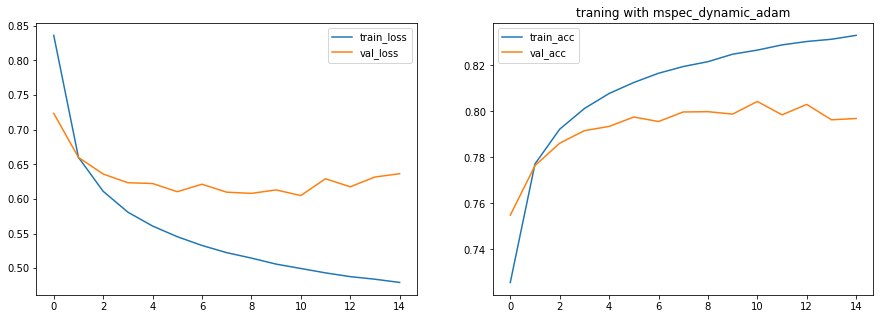

In [0]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for training with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('acc with mspec_dynamic_adam')
plt.show()

In [0]:
model = load_model('mspec_dynamic_adam.h5')
score = model.evaluate(X_test, Y_test, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
Y_pred = model.predict(X_test)
save_predictions(Y_test, Y_pred, 'lmfcc_dynamic')
print('\nConfusion Matrix')
plt.matshow(confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
plt.show()

NameError: ignored

3. model with non-dynamic lmfcc features

In [0]:
# Load data
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'nd_lmfcc_train_s.npz', allow_pickle=True) as data:
    X = data['lmfcc_x']
    Y = data['targets']
with np.load(path +'nd_lmfcc_val_s.npz', allow_pickle=True) as data:
    X_val = data['lmfcc_x']
    Y_val = data['targets']
with np.load(path + 'nd_lmfcc_test_s.npz', allow_pickle=True) as data:
    X_test = data['lmfcc_x']
    Y_test = data['targets']

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=15, batch_size=256, validation_data = (X_val, Y_val))

model.save('lmfcc_non_dynamic_adam.h5')

Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 19s 14us/step - loss: 1.2725 - accuracy: 0.6050 - val_loss: 1.1803 - val_accuracy: 0.6251
Epoch 2/15
1354605/1354605 [==============================] - 18s 14us/step - loss: 1.1458 - accuracy: 0.6375 - val_loss: 1.1485 - val_accuracy: 0.6364
Epoch 3/15
1354605/1354605 [==============================] - 18s 14us/step - loss: 1.1087 - accuracy: 0.6481 - val_loss: 1.1260 - val_accuracy: 0.6419
Epoch 4/15
1354605/1354605 [==============================] - 18s 14us/step - loss: 1.0845 - accuracy: 0.6555 - val_loss: 1.1199 - val_accuracy: 0.6436
Epoch 5/15
1354605/1354605 [==============================] - 18s 13us/step - loss: 1.0669 - accuracy: 0.6610 - val_loss: 1.1029 - val_accuracy: 0.6495
Epoch 6/15
1354605/1354605 [==============================] - 18s 13us/step - loss: 1.0533 - accuracy: 0.6648 - val_loss: 1.0961 - val_accuracy: 0.6521
Epoch 7/15
1354605/1354605 [=======

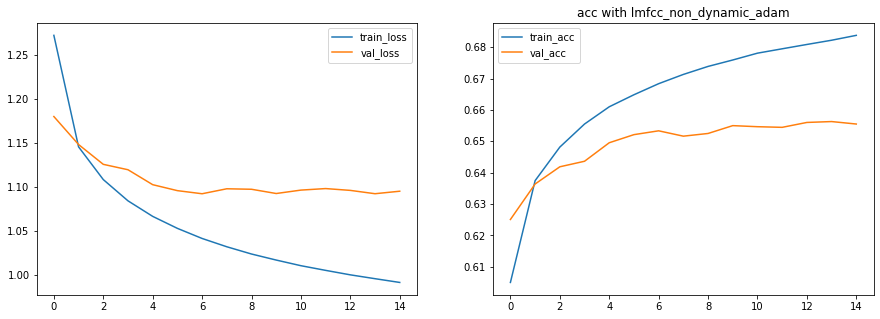

In [0]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for traning with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('acc with lmfcc_non_dynamic_adam')
plt.show()

1526682/1526682 [==============================] - 15s 10us/step
accuracy: 60.10%

Confusion Matrix


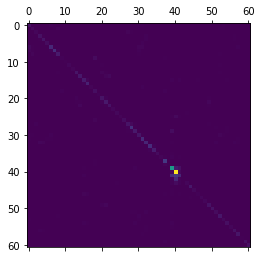

In [0]:
model = load_model('lmfcc_non_dynamic_adam.h5')
score = model.evaluate(X_test, Y_test, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
Y_pred = model.predict(X_test)
#save_predictions(Y_test, Y_pred, 'lmfcc_dynamic')
print('\nConfusion Matrix')
plt.matshow(confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
plt.show()

4. model with non-dynamic mspec features

In [0]:
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'nd_mspec_train_s.npz', allow_pickle=True) as data:
    X = data['mspec_x']
    Y = data['targets']
with np.load(path +'nd_mspec_val_s.npz', allow_pickle=True) as data:
    X_val = data['mspec_x']
    Y_val = data['targets']
with np.load(path + 'nd_mspec_test_s.npz', allow_pickle=True) as data:
    X_test = data['mspec_x']
    Y_test = data['targets']

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=15, batch_size=256, validation_data = (X_val, Y_val))

model.save('mspec_non_dynamic_adam.h5')

Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 18s 13us/step - loss: 1.2859 - accuracy: 0.5995 - val_loss: 1.1733 - val_accuracy: 0.6276
Epoch 2/15
1354605/1354605 [==============================] - 17s 13us/step - loss: 1.1205 - accuracy: 0.6458 - val_loss: 1.1123 - val_accuracy: 0.6476
Epoch 3/15
1354605/1354605 [==============================] - 18s 13us/step - loss: 1.0704 - accuracy: 0.6605 - val_loss: 1.0931 - val_accuracy: 0.6524
Epoch 4/15
1354605/1354605 [==============================] - 17s 13us/step - loss: 1.0382 - accuracy: 0.6699 - val_loss: 1.0746 - val_accuracy: 0.6584
Epoch 5/15
1354605/1354605 [==============================] - 18s 13us/step - loss: 1.0152 - accuracy: 0.6767 - val_loss: 1.0685 - val_accuracy: 0.6596
Epoch 6/15
1354605/1354605 [==============================] - 17s 13us/step - loss: 0.9971 - accuracy: 0.6826 - val_loss: 1.0551 - val_accuracy: 0.6657
Epoch 7/15
1354605/1354605 [=======

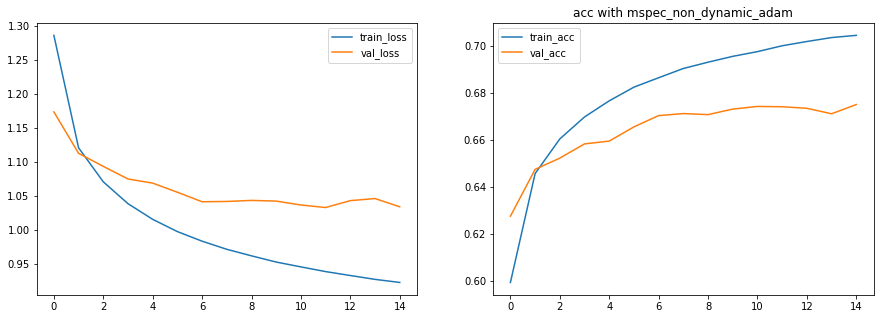

In [0]:
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for traning with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('acc with mspec_non_dynamic_adam')
plt.show()

1526682/1526682 [==============================] - 16s 10us/step
accuracy: 61.40%

Confusion Matrix


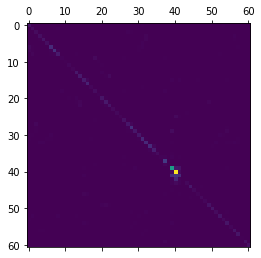

In [0]:
model = load_model('mspec_non_dynamic_adam.h5')
score = model.evaluate(X_test, Y_test, batch_size=128)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
Y_pred = model.predict(X_test)
#save_predictions(Y_test, Y_pred, 'lmfcc_dynamic')
print('\nConfusion Matrix')
plt.matshow(confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1)))
plt.show()

In [0]:
stateList 

['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

# Classification performance: 
ACC, frame-by-frame for dynamic_mfcc


In [0]:
# Load data
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'lmfcc_train_s.npz', allow_pickle=True) as data:
    X = data['lmfcc_x']
    Y = data['targets']
with np.load(path +'lmfcc_val_s.npz', allow_pickle=True) as data:
    X_val = data['lmfcc_x']
    Y_val = data['targets']
with np.load(path + 'lmfcc_test_s.npz', allow_pickle=True) as data:
    X_test = data['lmfcc_x']
    Y_test = data['targets']

In [0]:
model = load_model(path + 'lmfcc_dynamic_adam.h5')
Y_pred = model.predict(X_test)

In [0]:
Y_pred.shape

(1526682, 61)

In [0]:
stateList = list(np.load(path + 'statelist.npz')['arr_0'])
labels = [i for i in range(len(stateList))]

ACC, frame-by-frame at the state level for dynamic_mfcc

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.viridis):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize = (15,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [0]:
class_predictions = np.argmax(Y_pred, axis=1)
Y_test_target =  np.argmax(Y_test, axis=1)
num_frame = Y_test_target.shape[0]

print(np.sum(class_predictions == Y_test_target)/num_frame)

0.7697883383704006


In [0]:
class_predictions.shape 

(1526682,)

Normalized confusion matrix


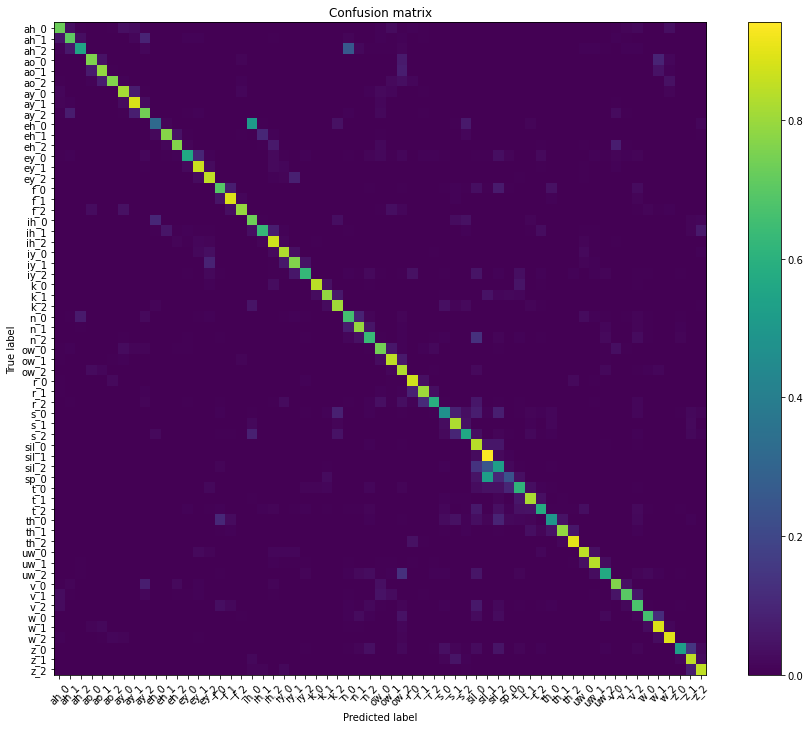

In [0]:
cnf_matrix = confusion_matrix(Y_test_target, class_predictions, labels = labels)
plot_confusion_matrix(cnf_matrix, classes = stateList, normalize=True)

In [0]:
Y_test_target

array([39, 40, 40, ..., 40, 40, 40])

# ACC frame-by-frame at the phoneme level for dynamic_mfcc

In [0]:
pred_phon = np.array([stateList[idx][:-2] for idx in class_predictions])
label_phon = np.array([stateList[idx][:-2] for idx in Y_test_target])
print(np.sum(pred_phon == label_phon)/num_frame)

0.8551407562282125


In [0]:
label_phon
phoneme_list = np.unique(label_phon)
phoneme_list

array(['ah', 'ao', 'ay', 'eh', 'ey', 'f', 'ih', 'iy', 'k', 'n', 'ow', 'r',
       's', 'sil', 'sp', 't', 'th', 'uw', 'v', 'w', 'z'], dtype='<U3')

Normalized confusion matrix


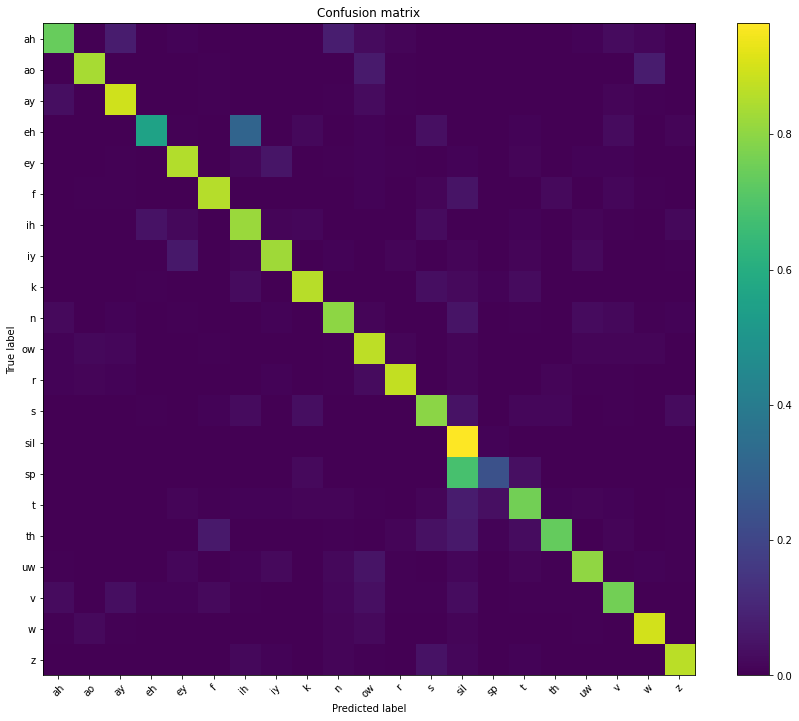

In [0]:
cnf_matrix = confusion_matrix(label_phon, pred_phon, labels = phoneme_list)
plot_confusion_matrix(cnf_matrix, classes = phoneme_list, normalize=True)

# PER calculation

In [0]:
def cal_distance(pred, target):
  return np.sum(pred != target)

In [0]:
import editdistance
def phone_error_rate(level,pred,ans):
  testdata = np.load(path + 'test_data.npz', allow_pickle=True)['test_data']
  utt_len_ls = [len(utt['targets']) for utt in testdata]

  cur_ptr = 0
  s = 0
  print("Total {} utterances".format(len(utt_len_ls)))
  for cnt,utt_len in enumerate(utt_len_ls):
      if level == 'state':
          tmp_pred = np.array([stateList[idx] for idx in pred[cur_ptr:cur_ptr + utt_len]])
          tmp_ans = np.array([stateList[idx] for idx in ans[cur_ptr:cur_ptr + utt_len]])
      else:
          tmp_pred = np.array([stateList[idx][:-2] for idx in pred[cur_ptr:cur_ptr + utt_len]])
          tmp_ans = np.array([stateList[idx][:-2] for idx in ans[cur_ptr:cur_ptr + utt_len]])

      cur_ptr += utt_len
      
      new_pred = [tmp_pred[0]]
      for st in tmp_pred[1:]:
          if new_pred[-1] != st:
              new_pred.append(st)

      new_ans = [tmp_ans[0]]
      for st in tmp_ans[1:]:
          if new_ans[-1] != st:
              new_ans.append(st)

      #s += cal_distance(new_pred,new_ans)/len(new_ans)
      s += editdistance.eval(new_pred,new_ans)/len(new_ans)

  return (100 * s) / len(utt_len_ls)

In [0]:
phone_error_rate('state', class_predictions, Y_test_target)

Total 8700 utterances


56.65016258345818

In [0]:
phone_error_rate('phoneme', class_predictions, Y_test_target)

Total 8700 utterances


104.84963018098104

# Model test for dynamic MFCC 
1. optimizer = sgd 

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=30, batch_size=256, validation_data = (X_val, Y_val))

Train on 1354605 samples, validate on 152452 samples
Epoch 1/30
1354605/1354605 [==============================] - 16s 12us/step - loss: 1.7633 - accuracy: 0.4905 - val_loss: 1.0985 - val_accuracy: 0.6503
Epoch 2/30
1354605/1354605 [==============================] - 14s 11us/step - loss: 0.9847 - accuracy: 0.6873 - val_loss: 0.9371 - val_accuracy: 0.6990
Epoch 3/30
1354605/1354605 [==============================] - 14s 10us/step - loss: 0.8848 - accuracy: 0.7163 - val_loss: 0.8864 - val_accuracy: 0.7174
Epoch 4/30
1354605/1354605 [==============================] - 14s 10us/step - loss: 0.8268 - accuracy: 0.7332 - val_loss: 0.8287 - val_accuracy: 0.7313
Epoch 5/30
1354605/1354605 [==============================] - 14s 10us/step - loss: 0.7872 - accuracy: 0.7454 - val_loss: 0.7984 - val_accuracy: 0.7407
Epoch 6/30
1354605/1354605 [==============================] - 14s 10us/step - loss: 0.7575 - accuracy: 0.7540 - val_loss: 0.7731 - val_accuracy: 0.7476
Epoch 7/30
1354605/1354605 [=======

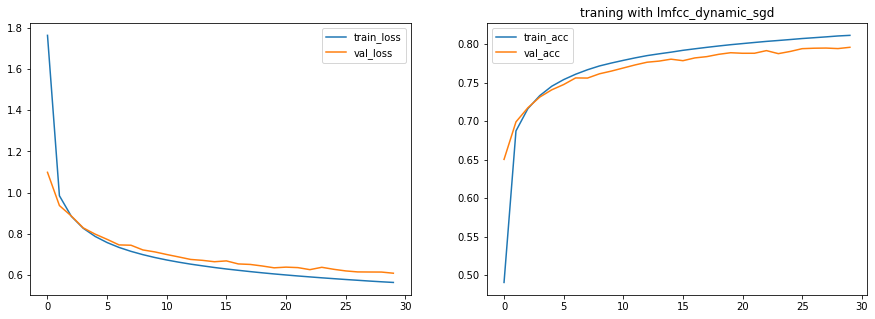

1526682/1526682 [==============================] - 15s 10us/step


[0.7212472197116183, 0.7655255198478699]

In [0]:
model.save(path + 'lmfcc_dynamic_sgd.h5')
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for traning with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('traning with lmfcc_dynamic_sgd')
plt.show()

model.evaluate(X_test, Y_test, batch_size=128)




```
# 2 different layers
```



In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, Y, epochs=15, batch_size=256, validation_data = (X_val, Y_val))

Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 28s 20us/step - loss: 0.8229 - accuracy: 0.7344 - val_loss: 0.7088 - val_accuracy: 0.7628
Epoch 2/15
1354605/1354605 [==============================] - 26s 19us/step - loss: 0.6581 - accuracy: 0.7804 - val_loss: 0.6504 - val_accuracy: 0.7831
Epoch 3/15
1354605/1354605 [==============================] - 26s 20us/step - loss: 0.6129 - accuracy: 0.7936 - val_loss: 0.6284 - val_accuracy: 0.7879
Epoch 4/15
1354605/1354605 [==============================] - 25s 19us/step - loss: 0.5842 - accuracy: 0.8011 - val_loss: 0.6111 - val_accuracy: 0.7930
Epoch 5/15
1354605/1354605 [==============================] - 25s 19us/step - loss: 0.5627 - accuracy: 0.8077 - val_loss: 0.6086 - val_accuracy: 0.7946
Epoch 6/15
1354605/1354605 [==============================] - 26s 19us/step - loss: 0.5471 - accuracy: 0.8124 - val_loss: 0.5965 - val_accuracy: 0.7976
Epoch 7/15
1354605/1354605 [=======

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               23552     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 61)                15677     
Total params: 105,021
Trainable params: 105,021
Non-trainable params: 0
_________________________________________________________________


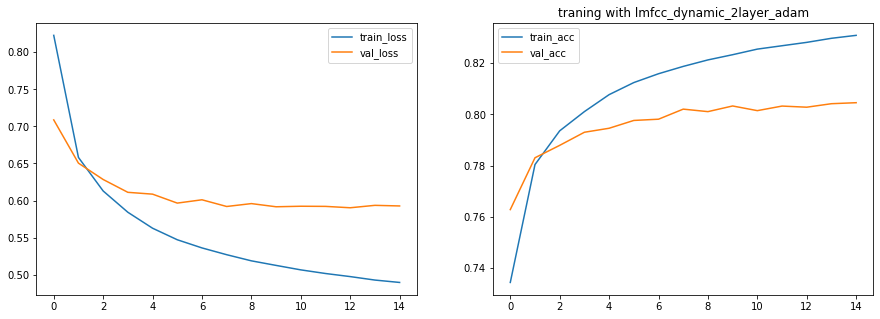

1526682/1526682 [==============================] - 22s 15us/step


[0.7407487976200631, 0.7720520496368408]

In [0]:
model.save(path + 'lmfcc_dynamic_adam_2layer.h5')
fig,ax = plt.subplots(ncols=2,figsize=(15,5))
#fig.suptitle("epochs=%d  $\lambda$=%f lr=%f batch_size=%d"%(epochs,self.lamda,lr,batch_size))

ax[0].plot(history.history['loss'],label='train_loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].legend()

#ax[0].title('losses for traning with lmfcc_dynamic_adam')
ax[1].plot(history.history['accuracy'],label='train_acc')
ax[1].plot(history.history['val_accuracy'],label='val_acc')
ax[1].legend()
plt.title('traning with lmfcc_dynamic_2layer_adam')
plt.show()

model.evaluate(X_test, Y_test, batch_size=128)

batch size = 128

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(X.shape[1],), activation='relu') )
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               23552     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 61)                15677     
Total params: 170,813
Trainable params: 170,813
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X, Y, epochs=15, batch_size=128, validation_data = (X_val, Y_val))

Train on 1354605 samples, validate on 152452 samples
Epoch 1/15
1354605/1354605 [==============================] - 57s 42us/step - loss: 0.7760 - accuracy: 0.7437 - val_loss: 0.6792 - val_accuracy: 0.7740
Epoch 2/15
1354605/1354605 [==============================] - 58s 43us/step - loss: 0.6194 - accuracy: 0.7892 - val_loss: 0.6249 - val_accuracy: 0.7879
Epoch 3/15
1354605/1354605 [==============================] - 57s 42us/step - loss: 0.5755 - accuracy: 0.8023 - val_loss: 0.6142 - val_accuracy: 0.7922
Epoch 4/15
1354605/1354605 [==============================] - 57s 42us/step - loss: 0.5511 - accuracy: 0.8099 - val_loss: 0.6109 - val_accuracy: 0.7953
Epoch 5/15
1354605/1354605 [==============================] - 57s 42us/step - loss: 0.5355 - accuracy: 0.8145 - val_loss: 0.6047 - val_accuracy: 0.7995
Epoch 6/15
1354605/1354605 [==============================] - 56s 42us/step - loss: 0.5232 - accuracy: 0.8190 - val_loss: 0.6126 - val_accuracy: 0.7962
Epoch 7/15
1354605/1354605 [=======

In [0]:
model.evaluate(X_test, Y_test, batch_size=128)

1526682/1526682 [==============================] - 23s 15us/step


[0.8167901115445475, 0.7661608457565308]

# posterior for test z43a.wave

In [0]:
path = '/content/drive/My Drive/DT2119/lab3data/'
with np.load(path + 'test_z43a0.npz', allow_pickle=True) as data:
    X_sample = data['features']
    labels = data['targets']

In [0]:
X_sample.shape

(178, 91)

In [0]:
#model = load_model(path + 'lmfcc_dynamic_adam.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               23552     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 61)                15677     
Total params: 170,813
Trainable params: 170,813
Non-trainable params: 0
_________________________________________________________________


In [0]:
posters = model.predict(X_sample)
posters.shape

(178, 61)

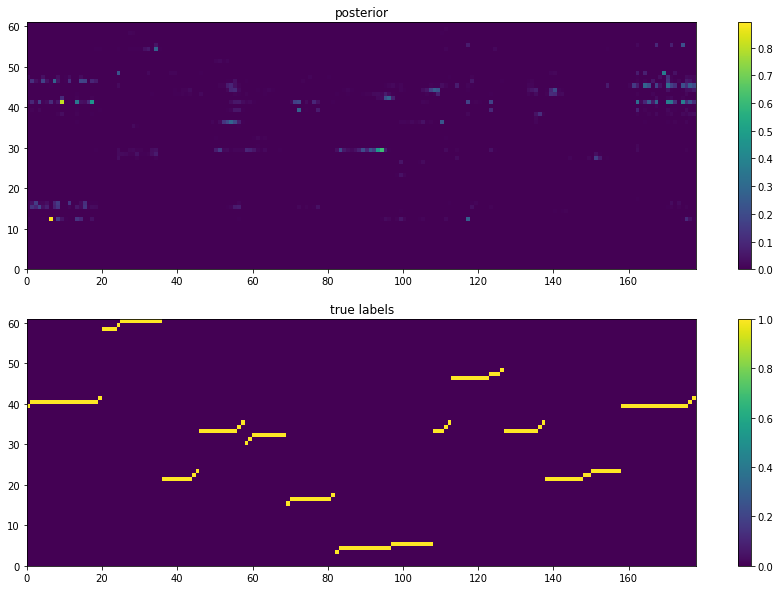

In [0]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
plt.title("posterior")
plt.pcolormesh(posters.T)
plt.colorbar()

from keras.utils import np_utils
plt.subplot(2,1,2)
plt.title('true labels')
plt.pcolormesh(np_utils.to_categorical(labels,61).T)
plt.colorbar()
plt.show()

In [0]:
pred = np.argmax(posters, axis=1)


In [0]:
posters

array([[9.5058916e-10, 8.9593888e-10, 1.5722559e-10, ..., 7.0161950e-05,
        1.2628112e-05, 8.8475502e-09],
       [1.1142494e-15, 1.1734033e-15, 9.3754330e-18, ..., 8.3649758e-07,
        2.2136728e-11, 4.7833255e-15],
       [3.0056361e-14, 1.8974277e-15, 3.1608974e-15, ..., 4.0135453e-07,
        1.1800121e-09, 6.2919016e-16],
       ...,
       [5.9047238e-12, 1.5375735e-09, 7.4233380e-12, ..., 1.0812423e-03,
        4.3715609e-05, 6.1965983e-09],
       [9.0667154e-09, 2.8867484e-08, 1.0502058e-08, ..., 2.6588657e-04,
        1.4631860e-03, 1.1259524e-04],
       [7.1412087e-10, 1.3259852e-08, 1.1862426e-07, ..., 7.0956419e-04,
        1.2968607e-03, 1.1484923e-04]], dtype=float32)

In [0]:
pred

array([47, 15, 16, 15, 46, 15, 12, 46, 16, 41, 12, 16, 55, 41, 46, 46, 41,
       41, 46, 54, 32, 54, 58, 27, 48, 28, 28, 29, 35, 28, 29, 54, 54, 28,
       54, 54, 28, 48, 48, 48, 43, 44, 44, 44, 48, 45, 43, 43, 32, 36, 29,
       29, 36, 36, 36, 36, 36, 41, 29, 29, 29, 32, 29, 29, 44, 44, 44, 29,
       32, 41, 41, 41, 39, 46, 41, 47, 41, 39, 27, 47, 47, 41, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 42, 42, 42, 12, 12, 12, 36,
       36, 36, 36, 36, 44, 44, 44, 44, 36, 29, 47, 27, 45, 54, 41, 12, 46,
       16, 41, 41, 41, 41, 54, 48, 46, 46, 36, 32, 32, 36, 45, 44, 44, 44,
       38, 38, 43, 43, 44, 43, 43, 14, 27, 43, 27, 27, 27, 27, 27, 27, 27,
       45, 45, 45, 27, 45, 55, 45, 45, 45, 41, 41, 45, 41, 41, 41, 45, 48,
       41, 41, 45, 16, 41, 45, 45, 45])

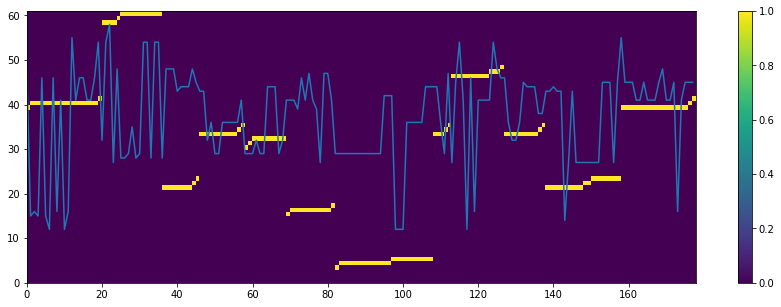

In [0]:
plt.figure(figsize=(15, 5))
plt.pcolormesh(np_utils.to_categorical(labels,61).T)
plt.colorbar()
plt.plot(pred)